In [7]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import os


In [8]:
import joblib
import pandas as pd

data_kcat = joblib.load('/Users/pinchichen/2025S lab/AI drug project/Catpred/dataset/km/km_with_features.joblib')
data_kcat.head()

,Sequence,sequence_source,uniprot,Smiles,value,ec,taxonomy_id,log10_value,log10km_mean,metabolite_features,protein_features
0,MGQEKLYIEKELSWLSFNERVLQEAADKSNPLIERMRFLGIYSNNL...,sabio,P0A7B1,Nc1nc2c(ncn2C2OC(COP(=O)(O)OP(=O)(O)O)C(O)C2O)...,0.6300,2.7.4.1,562,-0.200659,-0.200659,"[0.25370342, -0.3417107, -0.28024313, -0.04292...","[-0.06592023, -0.062496405, -0.012068139, 0.06..."
1,MSQQPHTEQFPKNQPPLAERLASARQLVTKAISAVPPHPEPLPSPN...,brenda,A0A0S2SWE4,CC/C=C\C/C=C\C/C=C\CCCCCCCC(=O)O,0.0264,1.13.11.60,474922,-1.578396,-1.553572,"[0.61067283, 0.46248585, -0.051634412, -0.7397...","[0.16962084, -0.09671225, 0.116663285, 0.05065..."
2,MSAAADRLNLTSGHLNAGRKRSSSSVSLKAVEKPFKVTVIGSGNWG...,uniprot_search,A0A060KZ16,O=C(CO)COP(=O)(O)O,0.6100,1.1.1.8,114524,-0.214670,-0.214670,"[0.29938427, -0.0972216, -0.3334697, -0.721026...","[0.0933136, -0.117130496, 0.0676241, 0.0187789..."
3,MLAEKTRSIIKATVPVLEQQGTVITRTFYKNMLTEHTELLNIFNRT...,sabio,P39676,NC(=O)C1=CN(C2OC(COP(=O)(O)OP(=O)(O)OCC3OC(n4c...,0.0280,1.14.12.17,4932,-1.552842,-1.552842,"[0.639636, -0.14536878, -0.52627945, 0.1240742...","[-0.02827879, -0.04372119, 0.03182794, 0.19197..."
4,MASAERVPVSFNKPGRVPFGEVQGYAPGHIPAYSNKHDHFFSGERS...,uniprot_search,O60993,Nc1ncnc2c1ncn2[C@H]1O[C@H](COP(=O)([O-])OP(=O)...,0.4000,6.3.1.9,5656,-0.397940,-0.397940,"[0.25855744, 0.43888408, -0.7136499, 0.0234168...","[0.074476704, -0.050253637, 0.05497695, 0.1402..."


In [9]:
data_kcat.rename(columns={'log10km_mean':'label'},inplace=True)
data_kcat.head()

,Sequence,sequence_source,uniprot,Smiles,value,ec,taxonomy_id,log10_value,label,metabolite_features,protein_features
0,MGQEKLYIEKELSWLSFNERVLQEAADKSNPLIERMRFLGIYSNNL...,sabio,P0A7B1,Nc1nc2c(ncn2C2OC(COP(=O)(O)OP(=O)(O)O)C(O)C2O)...,0.6300,2.7.4.1,562,-0.200659,-0.200659,"[0.25370342, -0.3417107, -0.28024313, -0.04292...","[-0.06592023, -0.062496405, -0.012068139, 0.06..."
1,MSQQPHTEQFPKNQPPLAERLASARQLVTKAISAVPPHPEPLPSPN...,brenda,A0A0S2SWE4,CC/C=C\C/C=C\C/C=C\CCCCCCCC(=O)O,0.0264,1.13.11.60,474922,-1.578396,-1.553572,"[0.61067283, 0.46248585, -0.051634412, -0.7397...","[0.16962084, -0.09671225, 0.116663285, 0.05065..."
2,MSAAADRLNLTSGHLNAGRKRSSSSVSLKAVEKPFKVTVIGSGNWG...,uniprot_search,A0A060KZ16,O=C(CO)COP(=O)(O)O,0.6100,1.1.1.8,114524,-0.214670,-0.214670,"[0.29938427, -0.0972216, -0.3334697, -0.721026...","[0.0933136, -0.117130496, 0.0676241, 0.0187789..."
3,MLAEKTRSIIKATVPVLEQQGTVITRTFYKNMLTEHTELLNIFNRT...,sabio,P39676,NC(=O)C1=CN(C2OC(COP(=O)(O)OP(=O)(O)OCC3OC(n4c...,0.0280,1.14.12.17,4932,-1.552842,-1.552842,"[0.639636, -0.14536878, -0.52627945, 0.1240742...","[-0.02827879, -0.04372119, 0.03182794, 0.19197..."
4,MASAERVPVSFNKPGRVPFGEVQGYAPGHIPAYSNKHDHFFSGERS...,uniprot_search,O60993,Nc1ncnc2c1ncn2[C@H]1O[C@H](COP(=O)([O-])OP(=O)...,0.4000,6.3.1.9,5656,-0.397940,-0.397940,"[0.25855744, 0.43888408, -0.7136499, 0.0234168...","[0.074476704, -0.050253637, 0.05497695, 0.1402..."


In [10]:
# Define dataset
class MPI_Dataset(Dataset):
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        row = self.dataframe.iloc[idx]
        return {
            'metabolite_features': torch.tensor(np.asarray(row['metabolite_features'], dtype=np.float32)),
            'protein_features': torch.tensor(np.asarray(row['protein_features'], dtype=np.float32)),
            'label': torch.tensor(float(row['label']), dtype=torch.float32),
        }

In [11]:
# Load data
# Assuming `combined_df` is a pandas DataFrame containing all necessary columns
train_df, temp_df = train_test_split(data_kcat, test_size=0.3, shuffle=True, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, shuffle=True, random_state=42)

train_dataset = MPI_Dataset(train_df)
val_dataset = MPI_Dataset(val_df)
test_dataset = MPI_Dataset(test_df)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)

In [12]:
import torch.nn as nn
import torch

# Define Diffusion Generative Model for Regression
class DiffusionGenerativeModel(nn.Module):
    def __init__(self, mol_input_dim, protein_input_dim, hidden_dim, num_timesteps):
        super(DiffusionGenerativeModel, self).__init__()
        self.num_timesteps = num_timesteps
        self.mol_encoder = nn.Linear(mol_input_dim, hidden_dim)
        self.protein_encoder = nn.Linear(protein_input_dim, hidden_dim)
        self.layer_norm = nn.LayerNorm(hidden_dim * 2)
        self.dropout = nn.Dropout(0.3)
        self.denoise_model = nn.Linear(hidden_dim * 2, hidden_dim)
        self.regressor = nn.Linear(hidden_dim, 1)  # Regression layer
        self.activation = nn.ReLU()

        # Embedding for timesteps
        self.timestep_embedding = nn.Embedding(num_timesteps, hidden_dim * 2)

    def forward(self, mol_features, protein_features, t):
        # Encode mol and protein features
        mol_embedding = self.activation(self.mol_encoder(mol_features))
        protein_embedding = self.activation(self.protein_encoder(protein_features))

        # Concatenate embeddings
        combined = torch.cat((mol_embedding, protein_embedding), dim=-1)
        combined = self.layer_norm(combined)
        combined = self.dropout(combined)

        # Add learnable timestep embedding
        t_embedding = self.timestep_embedding(t.long())
        combined += t_embedding

        # Denoise process
        denoised = self.activation(self.denoise_model(combined))

        # Regression layer
        output = self.regressor(denoised)  # Predict continuous values
        return output

    def add_noise(self, x, noise_level=0.1):
        noise = noise_level * torch.randn_like(x)
        return x + noise


In [13]:
# Check CUDA availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import pandas as pd
from sklearn.metrics import r2_score, median_absolute_error, explained_variance_score
from scipy.stats import pearsonr

train_history = pd.DataFrame(columns=[ 'epoch',
    'Train Loss', 'Train MSE', 'Train MAE', 'Train RMSE', 'Train R2', 'Train Pearson', 'Train Median_AE', 'Train Explained_VAR'
    'Val Loss', 'Val MSE', 'Val MAE', 'Val RMSE', 'Val R2', 'Val Pearson', 'Val Median_AE', 'Val Explained_VAR'])
# Verify feature dimensions
for batch in train_loader:
    mol_input_dim = batch['metabolite_features'].shape[1]  # Dynamically determine mol input dimension
    protein_input_dim = batch['protein_features'].shape[1]  # Dynamically determine protein input dimension
    break

# Initialize model, optimizer, and loss function
num_timesteps = 10
model = DiffusionGenerativeModel(mol_input_dim=mol_input_dim, protein_input_dim=protein_input_dim, hidden_dim=512, num_timesteps=num_timesteps)
model = model.to(device)
optimizer = optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.MSELoss()

# Training and Validation Loop
for epoch in range(2000):
    model.train()
    total_loss = 0.0
    val_total_loss = 0.0
    train_predictions, train_labels = [], []

    for batch in tqdm(train_loader, desc=f"Training Epoch {epoch + 1}"):
        mol_features = batch['metabolite_features'].to(device)
        protein_features = batch['protein_features'].to(device)
        labels = batch['label'].to(device)

        # Add noise to the features
        noisy_mol_features = model.add_noise(mol_features, noise_level=0.1)
        noisy_protein_features = model.add_noise(protein_features, noise_level=0.1)

        optimizer.zero_grad()
        outputs = model(noisy_mol_features, noisy_protein_features, torch.randint(0, num_timesteps, (mol_features.size(0),)).to(device)).squeeze()
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

        # Store predictions and labels for metrics
        train_predictions.extend(outputs.detach().cpu().numpy())
        train_labels.extend(labels.cpu().numpy())

    # Calculate training metrics
    train_mse = ((torch.tensor(train_predictions) - torch.tensor(train_labels))**2).mean().item()
    train_mae = torch.abs(torch.tensor(train_predictions) - torch.tensor(train_labels)).mean().item()
    train_rmse = torch.sqrt((torch.tensor(train_predictions) - torch.tensor(train_labels)) ** 2).mean().item()
    train_r2 = r2_score(np.array(train_labels), np.array(train_predictions))
    train_pearson_corr, _ = pearsonr(np.array(train_labels), np.array(train_predictions))
    train_median_ae = median_absolute_error(np.array(train_labels), np.array(train_predictions))
    train_explained_var = explained_variance_score(np.array(train_labels), np.array(train_predictions))

    if epoch % 10 == 0:
        print(f"Epoch {epoch} - Train Loss: {total_loss / len(train_loader):.4f}, Train MSE: {train_mse:.4f}, Train MAE: {train_mae:.4f}")

    # Validation
    model.eval()
    val_predictions, val_labels = [], []
    with torch.no_grad():
        for batch in val_loader:
            mol_features = batch['metabolite_features'].to(device)
            protein_features = batch['protein_features'].to(device)
            labels = batch['label'].to(device)

            # Add noise to the features
            noisy_mol_features = model.add_noise(mol_features, noise_level=0.1)
            noisy_protein_features = model.add_noise(protein_features, noise_level=0.1)

            outputs = model(noisy_mol_features, noisy_protein_features, torch.randint(0, num_timesteps, (mol_features.size(0),)).to(device)).squeeze()
            val_predictions.extend(outputs.cpu().numpy())
            val_labels.extend(labels.cpu().numpy())
            val_loss = criterion(outputs, labels)
            val_total_loss += val_loss.item()

    val_mse = ((torch.tensor(val_predictions) - torch.tensor(val_labels))**2).mean().item()
    val_mae = torch.abs(torch.tensor(val_predictions) - torch.tensor(val_labels)).mean().item()
    val_rmse = torch.sqrt((torch.tensor(val_predictions) - torch.tensor(val_labels)) ** 2).mean().item()
    val_r2 = r2_score(np.array(val_labels), np.array(val_predictions))
    val_pearson_corr, _ = pearsonr(np.array(val_labels), np.array(val_predictions))
    val_median_ae = median_absolute_error(np.array(val_labels), np.array(val_predictions))
    val_explained_var = explained_variance_score(np.array(val_labels), np.array(val_predictions))

    if epoch % 10 == 0:
        print(f"Epoch {epoch} - Validation Loss: {val_total_loss / len(val_loader):.4f}, Validation MSE: {val_mse:.4f}, Validation MAE: {val_mae:.4f}")

    # Save metrics to DataFrame
    new_row = {'epoch': epoch + 1, 'Train Loss': total_loss / len(train_loader), 'Train MSE': train_mse, 'Train MAE': train_mae, 'Train RMSE': train_rmse, 'Train R2': train_r2, 'Train Pearson': train_pearson_corr, 'Train Median_AE': train_median_ae, 'Train Explained_VAR': train_explained_var, 
               'Val Loss': val_total_loss / len(val_loader), 'Val MSE': val_mse, 'Val MAE': val_mae, 'Val RMSE': val_rmse, 'Val R2': val_r2, 'Val Pearson': val_pearson_corr, 'Val Median_AE': val_median_ae, 'Val Explained_VAR': val_explained_var}
    train_history = pd.concat([train_history, pd.DataFrame([new_row])], ignore_index=True)




Training Epoch 1: 100%|██████████| 901/901 [00:03<00:00, 241.34it/s]


Epoch 0 - Train Loss: 1.2214, Train MSE: 1.2214, Train MAE: 0.8661


/var/folders/yz/c1z6m9_d5d3f80sywjc3rqsc0000gn/T/ipykernel_83610/374893312.py:97: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  train_history = pd.concat([train_history, pd.DataFrame([new_row])], ignore_index=True)


Epoch 0 - Validation Loss: 1.1071, Validation MSE: 1.1071, Validation MAE: 0.8212


Training Epoch 11: 100%|██████████| 901/901 [00:04<00:00, 223.52it/s]


Epoch 10 - Train Loss: 0.9285, Train MSE: 0.9283, Train MAE: 0.7473
Epoch 10 - Validation Loss: 0.9284, Validation MSE: 0.9284, Validation MAE: 0.7430


Training Epoch 21: 100%|██████████| 901/901 [00:03<00:00, 237.30it/s]


Epoch 20 - Train Loss: 0.8286, Train MSE: 0.8288, Train MAE: 0.7045
Epoch 20 - Validation Loss: 0.8726, Validation MSE: 0.8726, Validation MAE: 0.7176


Training Epoch 31: 100%|██████████| 901/901 [00:03<00:00, 235.51it/s]


Epoch 30 - Train Loss: 0.7592, Train MSE: 0.7593, Train MAE: 0.6719
Epoch 30 - Validation Loss: 0.8705, Validation MSE: 0.8705, Validation MAE: 0.7178


Training Epoch 41: 100%|██████████| 901/901 [00:03<00:00, 236.37it/s]


Epoch 40 - Train Loss: 0.7052, Train MSE: 0.7053, Train MAE: 0.6480
Epoch 40 - Validation Loss: 0.8333, Validation MSE: 0.8333, Validation MAE: 0.6978


Training Epoch 51: 100%|██████████| 901/901 [00:04<00:00, 213.69it/s]


Epoch 50 - Train Loss: 0.6689, Train MSE: 0.6690, Train MAE: 0.6318
Epoch 50 - Validation Loss: 0.8405, Validation MSE: 0.8405, Validation MAE: 0.6982


Training Epoch 61: 100%|██████████| 901/901 [00:04<00:00, 220.98it/s]


Epoch 60 - Train Loss: 0.6313, Train MSE: 0.6313, Train MAE: 0.6125
Epoch 60 - Validation Loss: 0.8089, Validation MSE: 0.8089, Validation MAE: 0.6849


Training Epoch 71: 100%|██████████| 901/901 [00:04<00:00, 203.93it/s]


Epoch 70 - Train Loss: 0.5930, Train MSE: 0.5930, Train MAE: 0.5944
Epoch 70 - Validation Loss: 0.7977, Validation MSE: 0.7977, Validation MAE: 0.6813


Training Epoch 81: 100%|██████████| 901/901 [00:06<00:00, 149.41it/s]


Epoch 80 - Train Loss: 0.5706, Train MSE: 0.5706, Train MAE: 0.5832
Epoch 80 - Validation Loss: 0.7955, Validation MSE: 0.7955, Validation MAE: 0.6779


Training Epoch 91: 100%|██████████| 901/901 [00:06<00:00, 142.10it/s]


Epoch 90 - Train Loss: 0.5445, Train MSE: 0.5445, Train MAE: 0.5690
Epoch 90 - Validation Loss: 0.7824, Validation MSE: 0.7824, Validation MAE: 0.6734


Training Epoch 101: 100%|██████████| 901/901 [00:10<00:00, 86.42it/s] 


Epoch 100 - Train Loss: 0.5247, Train MSE: 0.5247, Train MAE: 0.5577
Epoch 100 - Validation Loss: 0.7827, Validation MSE: 0.7827, Validation MAE: 0.6685


Training Epoch 111: 100%|██████████| 901/901 [00:06<00:00, 134.55it/s]


Epoch 110 - Train Loss: 0.5083, Train MSE: 0.5083, Train MAE: 0.5508
Epoch 110 - Validation Loss: 0.7723, Validation MSE: 0.7723, Validation MAE: 0.6657


Training Epoch 121: 100%|██████████| 901/901 [00:06<00:00, 131.40it/s]


Epoch 120 - Train Loss: 0.4856, Train MSE: 0.4857, Train MAE: 0.5368
Epoch 120 - Validation Loss: 0.7811, Validation MSE: 0.7811, Validation MAE: 0.6686


Training Epoch 131: 100%|██████████| 901/901 [00:06<00:00, 132.51it/s]


Epoch 130 - Train Loss: 0.4721, Train MSE: 0.4722, Train MAE: 0.5284
Epoch 130 - Validation Loss: 0.7727, Validation MSE: 0.7727, Validation MAE: 0.6606


Training Epoch 141: 100%|██████████| 901/901 [00:06<00:00, 129.76it/s]


Epoch 140 - Train Loss: 0.4602, Train MSE: 0.4601, Train MAE: 0.5207
Epoch 140 - Validation Loss: 0.7599, Validation MSE: 0.7599, Validation MAE: 0.6613


Training Epoch 151: 100%|██████████| 901/901 [00:05<00:00, 159.63it/s]


Epoch 150 - Train Loss: 0.4421, Train MSE: 0.4422, Train MAE: 0.5110
Epoch 150 - Validation Loss: 0.7746, Validation MSE: 0.7746, Validation MAE: 0.6613


Training Epoch 161: 100%|██████████| 901/901 [00:05<00:00, 157.66it/s]


Epoch 160 - Train Loss: 0.4332, Train MSE: 0.4332, Train MAE: 0.5061
Epoch 160 - Validation Loss: 0.7696, Validation MSE: 0.7696, Validation MAE: 0.6631


Training Epoch 171: 100%|██████████| 901/901 [00:05<00:00, 160.47it/s]


Epoch 170 - Train Loss: 0.4222, Train MSE: 0.4222, Train MAE: 0.4990
Epoch 170 - Validation Loss: 0.7593, Validation MSE: 0.7593, Validation MAE: 0.6573


Training Epoch 181: 100%|██████████| 901/901 [00:05<00:00, 156.60it/s]


Epoch 180 - Train Loss: 0.4122, Train MSE: 0.4122, Train MAE: 0.4928
Epoch 180 - Validation Loss: 0.7658, Validation MSE: 0.7658, Validation MAE: 0.6602


Training Epoch 191: 100%|██████████| 901/901 [00:05<00:00, 158.32it/s]


Epoch 190 - Train Loss: 0.3998, Train MSE: 0.3997, Train MAE: 0.4845
Epoch 190 - Validation Loss: 0.7642, Validation MSE: 0.7642, Validation MAE: 0.6542


Training Epoch 201: 100%|██████████| 901/901 [00:05<00:00, 156.13it/s]


Epoch 200 - Train Loss: 0.3946, Train MSE: 0.3947, Train MAE: 0.4801
Epoch 200 - Validation Loss: 0.7711, Validation MSE: 0.7711, Validation MAE: 0.6610


Training Epoch 211: 100%|██████████| 901/901 [00:05<00:00, 155.50it/s]


Epoch 210 - Train Loss: 0.3878, Train MSE: 0.3878, Train MAE: 0.4771
Epoch 210 - Validation Loss: 0.7667, Validation MSE: 0.7667, Validation MAE: 0.6545


Training Epoch 221: 100%|██████████| 901/901 [00:05<00:00, 155.69it/s]


Epoch 220 - Train Loss: 0.3778, Train MSE: 0.3778, Train MAE: 0.4712
Epoch 220 - Validation Loss: 0.7651, Validation MSE: 0.7651, Validation MAE: 0.6581


Training Epoch 231: 100%|██████████| 901/901 [00:05<00:00, 159.86it/s]


Epoch 230 - Train Loss: 0.3746, Train MSE: 0.3746, Train MAE: 0.4693
Epoch 230 - Validation Loss: 0.7625, Validation MSE: 0.7625, Validation MAE: 0.6537


Training Epoch 241: 100%|██████████| 901/901 [00:05<00:00, 157.10it/s]


Epoch 240 - Train Loss: 0.3642, Train MSE: 0.3642, Train MAE: 0.4628
Epoch 240 - Validation Loss: 0.7726, Validation MSE: 0.7726, Validation MAE: 0.6570


Training Epoch 251: 100%|██████████| 901/901 [00:05<00:00, 155.79it/s]


Epoch 250 - Train Loss: 0.3601, Train MSE: 0.3602, Train MAE: 0.4584
Epoch 250 - Validation Loss: 0.7679, Validation MSE: 0.7679, Validation MAE: 0.6555


Training Epoch 261: 100%|██████████| 901/901 [00:05<00:00, 157.84it/s]


Epoch 260 - Train Loss: 0.3593, Train MSE: 0.3593, Train MAE: 0.4598
Epoch 260 - Validation Loss: 0.7784, Validation MSE: 0.7784, Validation MAE: 0.6589


Training Epoch 271: 100%|██████████| 901/901 [00:05<00:00, 159.27it/s]


Epoch 270 - Train Loss: 0.3519, Train MSE: 0.3519, Train MAE: 0.4538
Epoch 270 - Validation Loss: 0.7622, Validation MSE: 0.7622, Validation MAE: 0.6549


Training Epoch 281: 100%|██████████| 901/901 [00:05<00:00, 157.36it/s]


Epoch 280 - Train Loss: 0.3436, Train MSE: 0.3436, Train MAE: 0.4514
Epoch 280 - Validation Loss: 0.7643, Validation MSE: 0.7643, Validation MAE: 0.6527


Training Epoch 291: 100%|██████████| 901/901 [00:05<00:00, 159.60it/s]


Epoch 290 - Train Loss: 0.3418, Train MSE: 0.3418, Train MAE: 0.4483
Epoch 290 - Validation Loss: 0.7696, Validation MSE: 0.7696, Validation MAE: 0.6545


Training Epoch 301: 100%|██████████| 901/901 [00:05<00:00, 156.56it/s]


Epoch 300 - Train Loss: 0.3352, Train MSE: 0.3352, Train MAE: 0.4433
Epoch 300 - Validation Loss: 0.7609, Validation MSE: 0.7609, Validation MAE: 0.6511


Training Epoch 311: 100%|██████████| 901/901 [00:05<00:00, 155.46it/s]


Epoch 310 - Train Loss: 0.3320, Train MSE: 0.3321, Train MAE: 0.4398
Epoch 310 - Validation Loss: 0.7724, Validation MSE: 0.7724, Validation MAE: 0.6574


Training Epoch 321: 100%|██████████| 901/901 [00:05<00:00, 155.51it/s]


Epoch 320 - Train Loss: 0.3270, Train MSE: 0.3270, Train MAE: 0.4372
Epoch 320 - Validation Loss: 0.7715, Validation MSE: 0.7715, Validation MAE: 0.6567


Training Epoch 331: 100%|██████████| 901/901 [00:05<00:00, 162.06it/s]


Epoch 330 - Train Loss: 0.3246, Train MSE: 0.3244, Train MAE: 0.4359
Epoch 330 - Validation Loss: 0.7641, Validation MSE: 0.7641, Validation MAE: 0.6504


Training Epoch 341: 100%|██████████| 901/901 [00:05<00:00, 158.64it/s]


Epoch 340 - Train Loss: 0.3226, Train MSE: 0.3226, Train MAE: 0.4342
Epoch 340 - Validation Loss: 0.7680, Validation MSE: 0.7680, Validation MAE: 0.6560


Training Epoch 351: 100%|██████████| 901/901 [00:05<00:00, 163.05it/s]


Epoch 350 - Train Loss: 0.3172, Train MSE: 0.3172, Train MAE: 0.4304
Epoch 350 - Validation Loss: 0.7627, Validation MSE: 0.7627, Validation MAE: 0.6520


Training Epoch 361: 100%|██████████| 901/901 [00:05<00:00, 159.62it/s]


Epoch 360 - Train Loss: 0.3202, Train MSE: 0.3202, Train MAE: 0.4317
Epoch 360 - Validation Loss: 0.7695, Validation MSE: 0.7695, Validation MAE: 0.6523


Training Epoch 371: 100%|██████████| 901/901 [00:05<00:00, 161.76it/s]


Epoch 370 - Train Loss: 0.3093, Train MSE: 0.3093, Train MAE: 0.4233
Epoch 370 - Validation Loss: 0.7710, Validation MSE: 0.7710, Validation MAE: 0.6553


Training Epoch 381: 100%|██████████| 901/901 [00:05<00:00, 164.83it/s]


Epoch 380 - Train Loss: 0.3058, Train MSE: 0.3058, Train MAE: 0.4227
Epoch 380 - Validation Loss: 0.7683, Validation MSE: 0.7683, Validation MAE: 0.6502


Training Epoch 391: 100%|██████████| 901/901 [00:05<00:00, 164.31it/s]


Epoch 390 - Train Loss: 0.3059, Train MSE: 0.3056, Train MAE: 0.4236
Epoch 390 - Validation Loss: 0.7666, Validation MSE: 0.7666, Validation MAE: 0.6509


Training Epoch 401: 100%|██████████| 901/901 [00:05<00:00, 167.06it/s]


Epoch 400 - Train Loss: 0.3006, Train MSE: 0.3005, Train MAE: 0.4198
Epoch 400 - Validation Loss: 0.7561, Validation MSE: 0.7561, Validation MAE: 0.6478


Training Epoch 411: 100%|██████████| 901/901 [00:05<00:00, 163.43it/s]


Epoch 410 - Train Loss: 0.2998, Train MSE: 0.2997, Train MAE: 0.4194
Epoch 410 - Validation Loss: 0.7636, Validation MSE: 0.7636, Validation MAE: 0.6511


Training Epoch 421: 100%|██████████| 901/901 [00:05<00:00, 165.03it/s]


Epoch 420 - Train Loss: 0.2988, Train MSE: 0.2988, Train MAE: 0.4167
Epoch 420 - Validation Loss: 0.7617, Validation MSE: 0.7617, Validation MAE: 0.6503


Training Epoch 431: 100%|██████████| 901/901 [00:05<00:00, 161.46it/s]


Epoch 430 - Train Loss: 0.2979, Train MSE: 0.2979, Train MAE: 0.4157
Epoch 430 - Validation Loss: 0.7664, Validation MSE: 0.7664, Validation MAE: 0.6495


Training Epoch 441: 100%|██████████| 901/901 [00:05<00:00, 163.16it/s]


Epoch 440 - Train Loss: 0.2952, Train MSE: 0.2952, Train MAE: 0.4159
Epoch 440 - Validation Loss: 0.7704, Validation MSE: 0.7704, Validation MAE: 0.6555


Training Epoch 451: 100%|██████████| 901/901 [00:05<00:00, 167.39it/s]


Epoch 450 - Train Loss: 0.2879, Train MSE: 0.2878, Train MAE: 0.4096
Epoch 450 - Validation Loss: 0.7622, Validation MSE: 0.7622, Validation MAE: 0.6514


Training Epoch 461: 100%|██████████| 901/901 [00:05<00:00, 162.42it/s]


Epoch 460 - Train Loss: 0.2865, Train MSE: 0.2865, Train MAE: 0.4087
Epoch 460 - Validation Loss: 0.7645, Validation MSE: 0.7645, Validation MAE: 0.6489


Training Epoch 471: 100%|██████████| 901/901 [00:05<00:00, 163.99it/s]


Epoch 470 - Train Loss: 0.2885, Train MSE: 0.2885, Train MAE: 0.4091
Epoch 470 - Validation Loss: 0.7691, Validation MSE: 0.7691, Validation MAE: 0.6499


Training Epoch 481: 100%|██████████| 901/901 [00:05<00:00, 164.11it/s]


Epoch 480 - Train Loss: 0.2844, Train MSE: 0.2844, Train MAE: 0.4074
Epoch 480 - Validation Loss: 0.7473, Validation MSE: 0.7473, Validation MAE: 0.6435


Training Epoch 491: 100%|██████████| 901/901 [00:05<00:00, 164.85it/s]


Epoch 490 - Train Loss: 0.2835, Train MSE: 0.2835, Train MAE: 0.4060
Epoch 490 - Validation Loss: 0.7675, Validation MSE: 0.7675, Validation MAE: 0.6492


Training Epoch 501: 100%|██████████| 901/901 [00:05<00:00, 174.43it/s]


Epoch 500 - Train Loss: 0.2786, Train MSE: 0.2787, Train MAE: 0.4028
Epoch 500 - Validation Loss: 0.7599, Validation MSE: 0.7599, Validation MAE: 0.6500


Training Epoch 511: 100%|██████████| 901/901 [00:05<00:00, 162.80it/s]


Epoch 510 - Train Loss: 0.2786, Train MSE: 0.2786, Train MAE: 0.4039
Epoch 510 - Validation Loss: 0.7558, Validation MSE: 0.7558, Validation MAE: 0.6480


Training Epoch 521: 100%|██████████| 901/901 [00:05<00:00, 165.83it/s]


Epoch 520 - Train Loss: 0.2756, Train MSE: 0.2756, Train MAE: 0.4023
Epoch 520 - Validation Loss: 0.7662, Validation MSE: 0.7662, Validation MAE: 0.6500


Training Epoch 531: 100%|██████████| 901/901 [00:05<00:00, 163.48it/s]


Epoch 530 - Train Loss: 0.2746, Train MSE: 0.2746, Train MAE: 0.3995
Epoch 530 - Validation Loss: 0.7599, Validation MSE: 0.7599, Validation MAE: 0.6493


Training Epoch 541: 100%|██████████| 901/901 [00:05<00:00, 164.06it/s]


Epoch 540 - Train Loss: 0.2750, Train MSE: 0.2750, Train MAE: 0.4012
Epoch 540 - Validation Loss: 0.7599, Validation MSE: 0.7599, Validation MAE: 0.6497


Training Epoch 551: 100%|██████████| 901/901 [00:05<00:00, 167.91it/s]


Epoch 550 - Train Loss: 0.2740, Train MSE: 0.2740, Train MAE: 0.3987
Epoch 550 - Validation Loss: 0.7507, Validation MSE: 0.7507, Validation MAE: 0.6447


Training Epoch 561: 100%|██████████| 901/901 [00:05<00:00, 163.14it/s]


Epoch 560 - Train Loss: 0.2701, Train MSE: 0.2700, Train MAE: 0.3969
Epoch 560 - Validation Loss: 0.7612, Validation MSE: 0.7612, Validation MAE: 0.6451


Training Epoch 571: 100%|██████████| 901/901 [00:05<00:00, 163.07it/s]


Epoch 570 - Train Loss: 0.2672, Train MSE: 0.2672, Train MAE: 0.3949
Epoch 570 - Validation Loss: 0.7595, Validation MSE: 0.7595, Validation MAE: 0.6481


Training Epoch 581: 100%|██████████| 901/901 [00:05<00:00, 163.95it/s]


Epoch 580 - Train Loss: 0.2640, Train MSE: 0.2640, Train MAE: 0.3926
Epoch 580 - Validation Loss: 0.7518, Validation MSE: 0.7518, Validation MAE: 0.6454


Training Epoch 591: 100%|██████████| 901/901 [00:05<00:00, 164.32it/s]


Epoch 590 - Train Loss: 0.2673, Train MSE: 0.2672, Train MAE: 0.3934
Epoch 590 - Validation Loss: 0.7671, Validation MSE: 0.7671, Validation MAE: 0.6528


Training Epoch 601: 100%|██████████| 901/901 [00:05<00:00, 164.24it/s]


Epoch 600 - Train Loss: 0.2655, Train MSE: 0.2656, Train MAE: 0.3931
Epoch 600 - Validation Loss: 0.7613, Validation MSE: 0.7613, Validation MAE: 0.6473


Training Epoch 611: 100%|██████████| 901/901 [00:05<00:00, 164.02it/s]


Epoch 610 - Train Loss: 0.2607, Train MSE: 0.2607, Train MAE: 0.3901
Epoch 610 - Validation Loss: 0.7721, Validation MSE: 0.7721, Validation MAE: 0.6515


Training Epoch 621: 100%|██████████| 901/901 [00:05<00:00, 165.07it/s]


Epoch 620 - Train Loss: 0.2624, Train MSE: 0.2624, Train MAE: 0.3900
Epoch 620 - Validation Loss: 0.7608, Validation MSE: 0.7608, Validation MAE: 0.6490


Training Epoch 631: 100%|██████████| 901/901 [00:05<00:00, 163.03it/s]


Epoch 630 - Train Loss: 0.2604, Train MSE: 0.2603, Train MAE: 0.3908
Epoch 630 - Validation Loss: 0.7676, Validation MSE: 0.7676, Validation MAE: 0.6489


Training Epoch 641: 100%|██████████| 901/901 [00:05<00:00, 165.62it/s]


Epoch 640 - Train Loss: 0.2582, Train MSE: 0.2582, Train MAE: 0.3875
Epoch 640 - Validation Loss: 0.7547, Validation MSE: 0.7547, Validation MAE: 0.6444


Training Epoch 651: 100%|██████████| 901/901 [00:05<00:00, 164.92it/s]


Epoch 650 - Train Loss: 0.2568, Train MSE: 0.2569, Train MAE: 0.3871
Epoch 650 - Validation Loss: 0.7656, Validation MSE: 0.7656, Validation MAE: 0.6499


Training Epoch 661: 100%|██████████| 901/901 [00:05<00:00, 163.52it/s]


Epoch 660 - Train Loss: 0.2554, Train MSE: 0.2554, Train MAE: 0.3838
Epoch 660 - Validation Loss: 0.7536, Validation MSE: 0.7536, Validation MAE: 0.6431


Training Epoch 671: 100%|██████████| 901/901 [00:05<00:00, 162.71it/s]


Epoch 670 - Train Loss: 0.2546, Train MSE: 0.2545, Train MAE: 0.3849
Epoch 670 - Validation Loss: 0.7603, Validation MSE: 0.7603, Validation MAE: 0.6411


Training Epoch 681: 100%|██████████| 901/901 [00:05<00:00, 161.98it/s]


Epoch 680 - Train Loss: 0.2535, Train MSE: 0.2534, Train MAE: 0.3841
Epoch 680 - Validation Loss: 0.7506, Validation MSE: 0.7506, Validation MAE: 0.6417


Training Epoch 691: 100%|██████████| 901/901 [00:05<00:00, 163.55it/s]


Epoch 690 - Train Loss: 0.2513, Train MSE: 0.2513, Train MAE: 0.3812
Epoch 690 - Validation Loss: 0.7674, Validation MSE: 0.7674, Validation MAE: 0.6489


Training Epoch 701: 100%|██████████| 901/901 [00:05<00:00, 158.21it/s]


Epoch 700 - Train Loss: 0.2523, Train MSE: 0.2523, Train MAE: 0.3828
Epoch 700 - Validation Loss: 0.7677, Validation MSE: 0.7677, Validation MAE: 0.6490


Training Epoch 711: 100%|██████████| 901/901 [00:05<00:00, 161.84it/s]


Epoch 710 - Train Loss: 0.2570, Train MSE: 0.2570, Train MAE: 0.3853
Epoch 710 - Validation Loss: 0.7702, Validation MSE: 0.7702, Validation MAE: 0.6494


Training Epoch 721: 100%|██████████| 901/901 [00:05<00:00, 164.79it/s]


Epoch 720 - Train Loss: 0.2479, Train MSE: 0.2478, Train MAE: 0.3799
Epoch 720 - Validation Loss: 0.7676, Validation MSE: 0.7676, Validation MAE: 0.6482


Training Epoch 731: 100%|██████████| 901/901 [00:05<00:00, 159.21it/s]


Epoch 730 - Train Loss: 0.2479, Train MSE: 0.2479, Train MAE: 0.3801
Epoch 730 - Validation Loss: 0.7681, Validation MSE: 0.7681, Validation MAE: 0.6482


Training Epoch 741: 100%|██████████| 901/901 [00:05<00:00, 161.98it/s]


Epoch 740 - Train Loss: 0.2481, Train MSE: 0.2481, Train MAE: 0.3789
Epoch 740 - Validation Loss: 0.7531, Validation MSE: 0.7531, Validation MAE: 0.6455


Training Epoch 751: 100%|██████████| 901/901 [00:05<00:00, 161.62it/s]


Epoch 750 - Train Loss: 0.2446, Train MSE: 0.2445, Train MAE: 0.3765
Epoch 750 - Validation Loss: 0.7539, Validation MSE: 0.7539, Validation MAE: 0.6445


Training Epoch 761: 100%|██████████| 901/901 [00:05<00:00, 162.14it/s]


Epoch 760 - Train Loss: 0.2458, Train MSE: 0.2458, Train MAE: 0.3767
Epoch 760 - Validation Loss: 0.7600, Validation MSE: 0.7600, Validation MAE: 0.6479


Training Epoch 771: 100%|██████████| 901/901 [00:05<00:00, 162.12it/s]


Epoch 770 - Train Loss: 0.2418, Train MSE: 0.2419, Train MAE: 0.3740
Epoch 770 - Validation Loss: 0.7503, Validation MSE: 0.7503, Validation MAE: 0.6418


Training Epoch 781: 100%|██████████| 901/901 [00:05<00:00, 164.39it/s]


Epoch 780 - Train Loss: 0.2391, Train MSE: 0.2390, Train MAE: 0.3726
Epoch 780 - Validation Loss: 0.7497, Validation MSE: 0.7497, Validation MAE: 0.6402


Training Epoch 791: 100%|██████████| 901/901 [00:05<00:00, 162.48it/s]


Epoch 790 - Train Loss: 0.2419, Train MSE: 0.2419, Train MAE: 0.3742
Epoch 790 - Validation Loss: 0.7610, Validation MSE: 0.7610, Validation MAE: 0.6440


Training Epoch 801: 100%|██████████| 901/901 [00:05<00:00, 163.62it/s]


Epoch 800 - Train Loss: 0.2390, Train MSE: 0.2390, Train MAE: 0.3723
Epoch 800 - Validation Loss: 0.7608, Validation MSE: 0.7608, Validation MAE: 0.6463


Training Epoch 811: 100%|██████████| 901/901 [00:05<00:00, 161.25it/s]


Epoch 810 - Train Loss: 0.2419, Train MSE: 0.2419, Train MAE: 0.3749
Epoch 810 - Validation Loss: 0.7656, Validation MSE: 0.7656, Validation MAE: 0.6471


Training Epoch 821: 100%|██████████| 901/901 [00:05<00:00, 161.33it/s]


Epoch 820 - Train Loss: 0.2413, Train MSE: 0.2413, Train MAE: 0.3723
Epoch 820 - Validation Loss: 0.7589, Validation MSE: 0.7589, Validation MAE: 0.6416


Training Epoch 831: 100%|██████████| 901/901 [00:05<00:00, 162.46it/s]


Epoch 830 - Train Loss: 0.2373, Train MSE: 0.2373, Train MAE: 0.3708
Epoch 830 - Validation Loss: 0.7624, Validation MSE: 0.7624, Validation MAE: 0.6485


Training Epoch 841: 100%|██████████| 901/901 [00:05<00:00, 161.74it/s]


Epoch 840 - Train Loss: 0.2379, Train MSE: 0.2377, Train MAE: 0.3714
Epoch 840 - Validation Loss: 0.7602, Validation MSE: 0.7602, Validation MAE: 0.6435


Training Epoch 851: 100%|██████████| 901/901 [00:05<00:00, 161.56it/s]


Epoch 850 - Train Loss: 0.2352, Train MSE: 0.2352, Train MAE: 0.3678
Epoch 850 - Validation Loss: 0.7648, Validation MSE: 0.7648, Validation MAE: 0.6464


Training Epoch 861: 100%|██████████| 901/901 [00:05<00:00, 160.52it/s]


Epoch 860 - Train Loss: 0.2365, Train MSE: 0.2365, Train MAE: 0.3710
Epoch 860 - Validation Loss: 0.7617, Validation MSE: 0.7617, Validation MAE: 0.6470


Training Epoch 871: 100%|██████████| 901/901 [00:05<00:00, 166.58it/s]


Epoch 870 - Train Loss: 0.2328, Train MSE: 0.2328, Train MAE: 0.3667
Epoch 870 - Validation Loss: 0.7741, Validation MSE: 0.7741, Validation MAE: 0.6506


Training Epoch 881: 100%|██████████| 901/901 [00:05<00:00, 161.58it/s]


Epoch 880 - Train Loss: 0.2338, Train MSE: 0.2338, Train MAE: 0.3693
Epoch 880 - Validation Loss: 0.7648, Validation MSE: 0.7648, Validation MAE: 0.6474


Training Epoch 891: 100%|██████████| 901/901 [00:05<00:00, 161.07it/s]


Epoch 890 - Train Loss: 0.2348, Train MSE: 0.2349, Train MAE: 0.3684
Epoch 890 - Validation Loss: 0.7629, Validation MSE: 0.7629, Validation MAE: 0.6456


Training Epoch 901: 100%|██████████| 901/901 [00:05<00:00, 158.50it/s]


Epoch 900 - Train Loss: 0.2338, Train MSE: 0.2338, Train MAE: 0.3678
Epoch 900 - Validation Loss: 0.7586, Validation MSE: 0.7586, Validation MAE: 0.6461


Training Epoch 911: 100%|██████████| 901/901 [00:05<00:00, 162.29it/s]


Epoch 910 - Train Loss: 0.2335, Train MSE: 0.2335, Train MAE: 0.3676
Epoch 910 - Validation Loss: 0.7557, Validation MSE: 0.7557, Validation MAE: 0.6433


Training Epoch 921: 100%|██████████| 901/901 [00:05<00:00, 162.66it/s]


Epoch 920 - Train Loss: 0.2284, Train MSE: 0.2284, Train MAE: 0.3632
Epoch 920 - Validation Loss: 0.7656, Validation MSE: 0.7656, Validation MAE: 0.6457


Training Epoch 931: 100%|██████████| 901/901 [00:05<00:00, 157.40it/s]


Epoch 930 - Train Loss: 0.2308, Train MSE: 0.2308, Train MAE: 0.3650
Epoch 930 - Validation Loss: 0.7589, Validation MSE: 0.7589, Validation MAE: 0.6443


Training Epoch 941: 100%|██████████| 901/901 [00:05<00:00, 162.12it/s]


Epoch 940 - Train Loss: 0.2341, Train MSE: 0.2341, Train MAE: 0.3681
Epoch 940 - Validation Loss: 0.7637, Validation MSE: 0.7637, Validation MAE: 0.6467


Training Epoch 951: 100%|██████████| 901/901 [00:05<00:00, 162.19it/s]


Epoch 950 - Train Loss: 0.2296, Train MSE: 0.2296, Train MAE: 0.3647
Epoch 950 - Validation Loss: 0.7647, Validation MSE: 0.7647, Validation MAE: 0.6488


Training Epoch 961: 100%|██████████| 901/901 [00:05<00:00, 166.69it/s]


Epoch 960 - Train Loss: 0.2266, Train MSE: 0.2265, Train MAE: 0.3625
Epoch 960 - Validation Loss: 0.7574, Validation MSE: 0.7574, Validation MAE: 0.6448


Training Epoch 971: 100%|██████████| 901/901 [00:05<00:00, 160.96it/s]


Epoch 970 - Train Loss: 0.2307, Train MSE: 0.2307, Train MAE: 0.3650
Epoch 970 - Validation Loss: 0.7688, Validation MSE: 0.7688, Validation MAE: 0.6492


Training Epoch 981: 100%|██████████| 901/901 [00:05<00:00, 162.41it/s]


Epoch 980 - Train Loss: 0.2293, Train MSE: 0.2294, Train MAE: 0.3642
Epoch 980 - Validation Loss: 0.7529, Validation MSE: 0.7529, Validation MAE: 0.6415


Training Epoch 991: 100%|██████████| 901/901 [00:05<00:00, 163.33it/s]


Epoch 990 - Train Loss: 0.2276, Train MSE: 0.2276, Train MAE: 0.3635
Epoch 990 - Validation Loss: 0.7632, Validation MSE: 0.7632, Validation MAE: 0.6474


Training Epoch 1001: 100%|██████████| 901/901 [00:05<00:00, 162.62it/s]


Epoch 1000 - Train Loss: 0.2267, Train MSE: 0.2267, Train MAE: 0.3613
Epoch 1000 - Validation Loss: 0.7573, Validation MSE: 0.7573, Validation MAE: 0.6439


Training Epoch 1011: 100%|██████████| 901/901 [00:05<00:00, 164.17it/s]


Epoch 1010 - Train Loss: 0.2278, Train MSE: 0.2279, Train MAE: 0.3619
Epoch 1010 - Validation Loss: 0.7514, Validation MSE: 0.7514, Validation MAE: 0.6412


Training Epoch 1021: 100%|██████████| 901/901 [00:05<00:00, 161.85it/s]


Epoch 1020 - Train Loss: 0.2281, Train MSE: 0.2282, Train MAE: 0.3625
Epoch 1020 - Validation Loss: 0.7518, Validation MSE: 0.7518, Validation MAE: 0.6428


Training Epoch 1031: 100%|██████████| 901/901 [00:05<00:00, 161.58it/s]


Epoch 1030 - Train Loss: 0.2267, Train MSE: 0.2267, Train MAE: 0.3618
Epoch 1030 - Validation Loss: 0.7632, Validation MSE: 0.7632, Validation MAE: 0.6464


Training Epoch 1041: 100%|██████████| 901/901 [00:05<00:00, 161.99it/s]


Epoch 1040 - Train Loss: 0.2261, Train MSE: 0.2261, Train MAE: 0.3612
Epoch 1040 - Validation Loss: 0.7702, Validation MSE: 0.7702, Validation MAE: 0.6473


Training Epoch 1051: 100%|██████████| 901/901 [00:05<00:00, 162.38it/s]


Epoch 1050 - Train Loss: 0.2268, Train MSE: 0.2268, Train MAE: 0.3625
Epoch 1050 - Validation Loss: 0.7621, Validation MSE: 0.7621, Validation MAE: 0.6469


Training Epoch 1061: 100%|██████████| 901/901 [00:05<00:00, 163.02it/s]


Epoch 1060 - Train Loss: 0.2249, Train MSE: 0.2248, Train MAE: 0.3610
Epoch 1060 - Validation Loss: 0.7607, Validation MSE: 0.7607, Validation MAE: 0.6456


Training Epoch 1071: 100%|██████████| 901/901 [00:05<00:00, 164.27it/s]


Epoch 1070 - Train Loss: 0.2223, Train MSE: 0.2223, Train MAE: 0.3588
Epoch 1070 - Validation Loss: 0.7588, Validation MSE: 0.7588, Validation MAE: 0.6453


Training Epoch 1081: 100%|██████████| 901/901 [00:05<00:00, 164.66it/s]


Epoch 1080 - Train Loss: 0.2192, Train MSE: 0.2192, Train MAE: 0.3561
Epoch 1080 - Validation Loss: 0.7552, Validation MSE: 0.7552, Validation MAE: 0.6418


Training Epoch 1091: 100%|██████████| 901/901 [00:05<00:00, 162.72it/s]


Epoch 1090 - Train Loss: 0.2211, Train MSE: 0.2211, Train MAE: 0.3578
Epoch 1090 - Validation Loss: 0.7536, Validation MSE: 0.7536, Validation MAE: 0.6416


Training Epoch 1101: 100%|██████████| 901/901 [00:05<00:00, 161.71it/s]


Epoch 1100 - Train Loss: 0.2228, Train MSE: 0.2228, Train MAE: 0.3579
Epoch 1100 - Validation Loss: 0.7591, Validation MSE: 0.7591, Validation MAE: 0.6412


Training Epoch 1111: 100%|██████████| 901/901 [00:05<00:00, 162.98it/s]


Epoch 1110 - Train Loss: 0.2189, Train MSE: 0.2189, Train MAE: 0.3561
Epoch 1110 - Validation Loss: 0.7664, Validation MSE: 0.7664, Validation MAE: 0.6463


Training Epoch 1121: 100%|██████████| 901/901 [00:05<00:00, 160.87it/s]


Epoch 1120 - Train Loss: 0.2207, Train MSE: 0.2207, Train MAE: 0.3570
Epoch 1120 - Validation Loss: 0.7491, Validation MSE: 0.7491, Validation MAE: 0.6390


Training Epoch 1131: 100%|██████████| 901/901 [00:05<00:00, 159.61it/s]


Epoch 1130 - Train Loss: 0.2194, Train MSE: 0.2193, Train MAE: 0.3562
Epoch 1130 - Validation Loss: 0.7626, Validation MSE: 0.7626, Validation MAE: 0.6468


Training Epoch 1141: 100%|██████████| 901/901 [00:05<00:00, 163.59it/s]


Epoch 1140 - Train Loss: 0.2198, Train MSE: 0.2197, Train MAE: 0.3562
Epoch 1140 - Validation Loss: 0.7527, Validation MSE: 0.7527, Validation MAE: 0.6390


Training Epoch 1151: 100%|██████████| 901/901 [00:05<00:00, 165.99it/s]


Epoch 1150 - Train Loss: 0.2180, Train MSE: 0.2181, Train MAE: 0.3547
Epoch 1150 - Validation Loss: 0.7612, Validation MSE: 0.7612, Validation MAE: 0.6438


Training Epoch 1161: 100%|██████████| 901/901 [00:05<00:00, 164.96it/s]


Epoch 1160 - Train Loss: 0.2199, Train MSE: 0.2199, Train MAE: 0.3558
Epoch 1160 - Validation Loss: 0.7595, Validation MSE: 0.7595, Validation MAE: 0.6452


Training Epoch 1171: 100%|██████████| 901/901 [00:05<00:00, 160.63it/s]


Epoch 1170 - Train Loss: 0.2184, Train MSE: 0.2185, Train MAE: 0.3548
Epoch 1170 - Validation Loss: 0.7622, Validation MSE: 0.7622, Validation MAE: 0.6455


Training Epoch 1181: 100%|██████████| 901/901 [00:05<00:00, 162.03it/s]


Epoch 1180 - Train Loss: 0.2147, Train MSE: 0.2147, Train MAE: 0.3510
Epoch 1180 - Validation Loss: 0.7519, Validation MSE: 0.7519, Validation MAE: 0.6399


Training Epoch 1191: 100%|██████████| 901/901 [00:05<00:00, 161.40it/s]


Epoch 1190 - Train Loss: 0.2121, Train MSE: 0.2121, Train MAE: 0.3504
Epoch 1190 - Validation Loss: 0.7644, Validation MSE: 0.7644, Validation MAE: 0.6477


Training Epoch 1201: 100%|██████████| 901/901 [00:05<00:00, 163.57it/s]


Epoch 1200 - Train Loss: 0.2167, Train MSE: 0.2167, Train MAE: 0.3534
Epoch 1200 - Validation Loss: 0.7611, Validation MSE: 0.7611, Validation MAE: 0.6455


Training Epoch 1211: 100%|██████████| 901/901 [00:05<00:00, 160.56it/s]


Epoch 1210 - Train Loss: 0.2177, Train MSE: 0.2177, Train MAE: 0.3535
Epoch 1210 - Validation Loss: 0.7689, Validation MSE: 0.7689, Validation MAE: 0.6451


Training Epoch 1221: 100%|██████████| 901/901 [00:05<00:00, 163.48it/s]


Epoch 1220 - Train Loss: 0.2118, Train MSE: 0.2118, Train MAE: 0.3504
Epoch 1220 - Validation Loss: 0.7536, Validation MSE: 0.7536, Validation MAE: 0.6400


Training Epoch 1231: 100%|██████████| 901/901 [00:05<00:00, 160.26it/s]


Epoch 1230 - Train Loss: 0.2127, Train MSE: 0.2127, Train MAE: 0.3499
Epoch 1230 - Validation Loss: 0.7552, Validation MSE: 0.7552, Validation MAE: 0.6405


Training Epoch 1241: 100%|██████████| 901/901 [00:05<00:00, 162.16it/s]


Epoch 1240 - Train Loss: 0.2120, Train MSE: 0.2120, Train MAE: 0.3506
Epoch 1240 - Validation Loss: 0.7654, Validation MSE: 0.7654, Validation MAE: 0.6447


Training Epoch 1251: 100%|██████████| 901/901 [00:05<00:00, 165.51it/s]


Epoch 1250 - Train Loss: 0.2128, Train MSE: 0.2128, Train MAE: 0.3513
Epoch 1250 - Validation Loss: 0.7628, Validation MSE: 0.7628, Validation MAE: 0.6460


Training Epoch 1261: 100%|██████████| 901/901 [00:05<00:00, 162.12it/s]


Epoch 1260 - Train Loss: 0.2132, Train MSE: 0.2132, Train MAE: 0.3510
Epoch 1260 - Validation Loss: 0.7531, Validation MSE: 0.7531, Validation MAE: 0.6415


Training Epoch 1271: 100%|██████████| 901/901 [00:05<00:00, 162.45it/s]


Epoch 1270 - Train Loss: 0.2126, Train MSE: 0.2126, Train MAE: 0.3512
Epoch 1270 - Validation Loss: 0.7637, Validation MSE: 0.7637, Validation MAE: 0.6450


Training Epoch 1281: 100%|██████████| 901/901 [00:05<00:00, 163.06it/s]


Epoch 1280 - Train Loss: 0.2128, Train MSE: 0.2128, Train MAE: 0.3512
Epoch 1280 - Validation Loss: 0.7507, Validation MSE: 0.7507, Validation MAE: 0.6404


Training Epoch 1291: 100%|██████████| 901/901 [00:05<00:00, 162.91it/s]


Epoch 1290 - Train Loss: 0.2105, Train MSE: 0.2104, Train MAE: 0.3494
Epoch 1290 - Validation Loss: 0.7536, Validation MSE: 0.7536, Validation MAE: 0.6381


Training Epoch 1301: 100%|██████████| 901/901 [00:05<00:00, 168.19it/s]


Epoch 1300 - Train Loss: 0.2109, Train MSE: 0.2109, Train MAE: 0.3480
Epoch 1300 - Validation Loss: 0.7572, Validation MSE: 0.7572, Validation MAE: 0.6425


Training Epoch 1311: 100%|██████████| 901/901 [00:05<00:00, 160.26it/s]


Epoch 1310 - Train Loss: 0.2073, Train MSE: 0.2073, Train MAE: 0.3466
Epoch 1310 - Validation Loss: 0.7560, Validation MSE: 0.7560, Validation MAE: 0.6421


Training Epoch 1321: 100%|██████████| 901/901 [00:05<00:00, 162.04it/s]


Epoch 1320 - Train Loss: 0.2083, Train MSE: 0.2083, Train MAE: 0.3476
Epoch 1320 - Validation Loss: 0.7664, Validation MSE: 0.7664, Validation MAE: 0.6442


Training Epoch 1331: 100%|██████████| 901/901 [00:05<00:00, 164.45it/s]


Epoch 1330 - Train Loss: 0.2123, Train MSE: 0.2123, Train MAE: 0.3501
Epoch 1330 - Validation Loss: 0.7595, Validation MSE: 0.7595, Validation MAE: 0.6394


Training Epoch 1341: 100%|██████████| 901/901 [00:05<00:00, 165.38it/s]


Epoch 1340 - Train Loss: 0.2105, Train MSE: 0.2105, Train MAE: 0.3494
Epoch 1340 - Validation Loss: 0.7580, Validation MSE: 0.7580, Validation MAE: 0.6378


Training Epoch 1351: 100%|██████████| 901/901 [00:05<00:00, 170.64it/s]


Epoch 1350 - Train Loss: 0.2106, Train MSE: 0.2106, Train MAE: 0.3474
Epoch 1350 - Validation Loss: 0.7452, Validation MSE: 0.7452, Validation MAE: 0.6355


Training Epoch 1361: 100%|██████████| 901/901 [00:05<00:00, 164.98it/s]


Epoch 1360 - Train Loss: 0.2122, Train MSE: 0.2122, Train MAE: 0.3494
Epoch 1360 - Validation Loss: 0.7601, Validation MSE: 0.7601, Validation MAE: 0.6433


Training Epoch 1371: 100%|██████████| 901/901 [00:05<00:00, 165.43it/s]


Epoch 1370 - Train Loss: 0.2066, Train MSE: 0.2066, Train MAE: 0.3454
Epoch 1370 - Validation Loss: 0.7473, Validation MSE: 0.7473, Validation MAE: 0.6414


Training Epoch 1381: 100%|██████████| 901/901 [00:05<00:00, 162.94it/s]


Epoch 1380 - Train Loss: 0.2057, Train MSE: 0.2058, Train MAE: 0.3445
Epoch 1380 - Validation Loss: 0.7475, Validation MSE: 0.7475, Validation MAE: 0.6359


Training Epoch 1391: 100%|██████████| 901/901 [00:05<00:00, 160.11it/s]


Epoch 1390 - Train Loss: 0.2073, Train MSE: 0.2072, Train MAE: 0.3457
Epoch 1390 - Validation Loss: 0.7564, Validation MSE: 0.7564, Validation MAE: 0.6420


Training Epoch 1401: 100%|██████████| 901/901 [00:05<00:00, 166.36it/s]


Epoch 1400 - Train Loss: 0.2040, Train MSE: 0.2040, Train MAE: 0.3423
Epoch 1400 - Validation Loss: 0.7632, Validation MSE: 0.7632, Validation MAE: 0.6472


Training Epoch 1411: 100%|██████████| 901/901 [00:05<00:00, 162.33it/s]


Epoch 1410 - Train Loss: 0.2097, Train MSE: 0.2097, Train MAE: 0.3461
Epoch 1410 - Validation Loss: 0.7680, Validation MSE: 0.7680, Validation MAE: 0.6484


Training Epoch 1421: 100%|██████████| 901/901 [00:05<00:00, 161.51it/s]


Epoch 1420 - Train Loss: 0.2103, Train MSE: 0.2103, Train MAE: 0.3490
Epoch 1420 - Validation Loss: 0.7613, Validation MSE: 0.7613, Validation MAE: 0.6442


Training Epoch 1431: 100%|██████████| 901/901 [00:05<00:00, 163.67it/s]


Epoch 1430 - Train Loss: 0.2090, Train MSE: 0.2090, Train MAE: 0.3461
Epoch 1430 - Validation Loss: 0.7636, Validation MSE: 0.7636, Validation MAE: 0.6461


Training Epoch 1441: 100%|██████████| 901/901 [00:05<00:00, 162.26it/s]


Epoch 1440 - Train Loss: 0.2073, Train MSE: 0.2072, Train MAE: 0.3441
Epoch 1440 - Validation Loss: 0.7466, Validation MSE: 0.7466, Validation MAE: 0.6381


Training Epoch 1451: 100%|██████████| 901/901 [00:05<00:00, 163.67it/s]


Epoch 1450 - Train Loss: 0.2041, Train MSE: 0.2041, Train MAE: 0.3436
Epoch 1450 - Validation Loss: 0.7616, Validation MSE: 0.7616, Validation MAE: 0.6425


Training Epoch 1461: 100%|██████████| 901/901 [00:05<00:00, 160.46it/s]


Epoch 1460 - Train Loss: 0.2041, Train MSE: 0.2041, Train MAE: 0.3438
Epoch 1460 - Validation Loss: 0.7507, Validation MSE: 0.7507, Validation MAE: 0.6362


Training Epoch 1471: 100%|██████████| 901/901 [00:05<00:00, 164.18it/s]


Epoch 1470 - Train Loss: 0.2047, Train MSE: 0.2047, Train MAE: 0.3437
Epoch 1470 - Validation Loss: 0.7542, Validation MSE: 0.7542, Validation MAE: 0.6416


Training Epoch 1481: 100%|██████████| 901/901 [00:05<00:00, 164.44it/s]


Epoch 1480 - Train Loss: 0.2047, Train MSE: 0.2047, Train MAE: 0.3437
Epoch 1480 - Validation Loss: 0.7502, Validation MSE: 0.7502, Validation MAE: 0.6383


Training Epoch 1491: 100%|██████████| 901/901 [00:05<00:00, 162.34it/s]


Epoch 1490 - Train Loss: 0.2012, Train MSE: 0.2012, Train MAE: 0.3418
Epoch 1490 - Validation Loss: 0.7547, Validation MSE: 0.7547, Validation MAE: 0.6424


Training Epoch 1501: 100%|██████████| 901/901 [00:05<00:00, 165.33it/s]


Epoch 1500 - Train Loss: 0.2027, Train MSE: 0.2027, Train MAE: 0.3420
Epoch 1500 - Validation Loss: 0.7626, Validation MSE: 0.7626, Validation MAE: 0.6450


Training Epoch 1511: 100%|██████████| 901/901 [00:05<00:00, 164.93it/s]


Epoch 1510 - Train Loss: 0.2045, Train MSE: 0.2045, Train MAE: 0.3434
Epoch 1510 - Validation Loss: 0.7499, Validation MSE: 0.7499, Validation MAE: 0.6414


Training Epoch 1521: 100%|██████████| 901/901 [00:05<00:00, 164.78it/s]


Epoch 1520 - Train Loss: 0.1995, Train MSE: 0.1995, Train MAE: 0.3389
Epoch 1520 - Validation Loss: 0.7540, Validation MSE: 0.7540, Validation MAE: 0.6426


Training Epoch 1531: 100%|██████████| 901/901 [00:05<00:00, 165.71it/s]


Epoch 1530 - Train Loss: 0.2049, Train MSE: 0.2050, Train MAE: 0.3423
Epoch 1530 - Validation Loss: 0.7458, Validation MSE: 0.7458, Validation MAE: 0.6382


Training Epoch 1541: 100%|██████████| 901/901 [00:05<00:00, 162.88it/s]


Epoch 1540 - Train Loss: 0.2022, Train MSE: 0.2022, Train MAE: 0.3402
Epoch 1540 - Validation Loss: 0.7539, Validation MSE: 0.7539, Validation MAE: 0.6409


Training Epoch 1551: 100%|██████████| 901/901 [00:05<00:00, 167.54it/s]


Epoch 1550 - Train Loss: 0.2026, Train MSE: 0.2026, Train MAE: 0.3422
Epoch 1550 - Validation Loss: 0.7652, Validation MSE: 0.7652, Validation MAE: 0.6477


Training Epoch 1561: 100%|██████████| 901/901 [00:05<00:00, 163.95it/s]


Epoch 1560 - Train Loss: 0.2029, Train MSE: 0.2029, Train MAE: 0.3413
Epoch 1560 - Validation Loss: 0.7582, Validation MSE: 0.7582, Validation MAE: 0.6450


Training Epoch 1571: 100%|██████████| 901/901 [00:05<00:00, 165.58it/s]


Epoch 1570 - Train Loss: 0.2027, Train MSE: 0.2028, Train MAE: 0.3417
Epoch 1570 - Validation Loss: 0.7599, Validation MSE: 0.7599, Validation MAE: 0.6408


Training Epoch 1581: 100%|██████████| 901/901 [00:05<00:00, 163.06it/s]


Epoch 1580 - Train Loss: 0.2048, Train MSE: 0.2048, Train MAE: 0.3433
Epoch 1580 - Validation Loss: 0.7616, Validation MSE: 0.7616, Validation MAE: 0.6435


Training Epoch 1591: 100%|██████████| 901/901 [00:05<00:00, 165.24it/s]


Epoch 1590 - Train Loss: 0.1997, Train MSE: 0.1997, Train MAE: 0.3401
Epoch 1590 - Validation Loss: 0.7519, Validation MSE: 0.7519, Validation MAE: 0.6393


Training Epoch 1601: 100%|██████████| 901/901 [00:05<00:00, 170.29it/s]


Epoch 1600 - Train Loss: 0.2007, Train MSE: 0.2007, Train MAE: 0.3400
Epoch 1600 - Validation Loss: 0.7586, Validation MSE: 0.7586, Validation MAE: 0.6409


Training Epoch 1611: 100%|██████████| 901/901 [00:05<00:00, 169.84it/s]


Epoch 1610 - Train Loss: 0.2022, Train MSE: 0.2022, Train MAE: 0.3395
Epoch 1610 - Validation Loss: 0.7601, Validation MSE: 0.7601, Validation MAE: 0.6431


Training Epoch 1621: 100%|██████████| 901/901 [00:05<00:00, 168.44it/s]


Epoch 1620 - Train Loss: 0.1991, Train MSE: 0.1991, Train MAE: 0.3392
Epoch 1620 - Validation Loss: 0.7532, Validation MSE: 0.7532, Validation MAE: 0.6417


Training Epoch 1631: 100%|██████████| 901/901 [00:05<00:00, 165.52it/s]


Epoch 1630 - Train Loss: 0.1984, Train MSE: 0.1985, Train MAE: 0.3373
Epoch 1630 - Validation Loss: 0.7547, Validation MSE: 0.7547, Validation MAE: 0.6385


Training Epoch 1641: 100%|██████████| 901/901 [00:05<00:00, 167.66it/s]


Epoch 1640 - Train Loss: 0.2000, Train MSE: 0.2001, Train MAE: 0.3399
Epoch 1640 - Validation Loss: 0.7615, Validation MSE: 0.7615, Validation MAE: 0.6422


Training Epoch 1651: 100%|██████████| 901/901 [00:05<00:00, 167.73it/s]


Epoch 1650 - Train Loss: 0.1987, Train MSE: 0.1987, Train MAE: 0.3385
Epoch 1650 - Validation Loss: 0.7660, Validation MSE: 0.7660, Validation MAE: 0.6467


Training Epoch 1661: 100%|██████████| 901/901 [00:05<00:00, 166.69it/s]


Epoch 1660 - Train Loss: 0.1992, Train MSE: 0.1992, Train MAE: 0.3389
Epoch 1660 - Validation Loss: 0.7687, Validation MSE: 0.7687, Validation MAE: 0.6451


Training Epoch 1671: 100%|██████████| 901/901 [00:05<00:00, 166.30it/s]


Epoch 1670 - Train Loss: 0.1959, Train MSE: 0.1959, Train MAE: 0.3364
Epoch 1670 - Validation Loss: 0.7508, Validation MSE: 0.7508, Validation MAE: 0.6412


Training Epoch 1681: 100%|██████████| 901/901 [00:05<00:00, 167.61it/s]


Epoch 1680 - Train Loss: 0.2004, Train MSE: 0.2004, Train MAE: 0.3397
Epoch 1680 - Validation Loss: 0.7611, Validation MSE: 0.7611, Validation MAE: 0.6431


Training Epoch 1691: 100%|██████████| 901/901 [00:05<00:00, 169.99it/s]


Epoch 1690 - Train Loss: 0.1969, Train MSE: 0.1969, Train MAE: 0.3371
Epoch 1690 - Validation Loss: 0.7580, Validation MSE: 0.7580, Validation MAE: 0.6421


Training Epoch 1701: 100%|██████████| 901/901 [00:05<00:00, 161.59it/s]


Epoch 1700 - Train Loss: 0.1985, Train MSE: 0.1985, Train MAE: 0.3393
Epoch 1700 - Validation Loss: 0.7575, Validation MSE: 0.7575, Validation MAE: 0.6422


Training Epoch 1711: 100%|██████████| 901/901 [00:05<00:00, 167.17it/s]


Epoch 1710 - Train Loss: 0.1990, Train MSE: 0.1990, Train MAE: 0.3384
Epoch 1710 - Validation Loss: 0.7658, Validation MSE: 0.7658, Validation MAE: 0.6427


Training Epoch 1721: 100%|██████████| 901/901 [00:05<00:00, 166.15it/s]


Epoch 1720 - Train Loss: 0.1941, Train MSE: 0.1940, Train MAE: 0.3348
Epoch 1720 - Validation Loss: 0.7693, Validation MSE: 0.7693, Validation MAE: 0.6478


Training Epoch 1731: 100%|██████████| 901/901 [00:05<00:00, 167.53it/s]


Epoch 1730 - Train Loss: 0.2000, Train MSE: 0.2001, Train MAE: 0.3396
Epoch 1730 - Validation Loss: 0.7528, Validation MSE: 0.7528, Validation MAE: 0.6404


Training Epoch 1741: 100%|██████████| 901/901 [00:05<00:00, 167.54it/s]


Epoch 1740 - Train Loss: 0.1938, Train MSE: 0.1938, Train MAE: 0.3350
Epoch 1740 - Validation Loss: 0.7544, Validation MSE: 0.7544, Validation MAE: 0.6404


Training Epoch 1751: 100%|██████████| 901/901 [00:05<00:00, 166.64it/s]


Epoch 1750 - Train Loss: 0.1964, Train MSE: 0.1964, Train MAE: 0.3357
Epoch 1750 - Validation Loss: 0.7587, Validation MSE: 0.7587, Validation MAE: 0.6414


Training Epoch 1761: 100%|██████████| 901/901 [00:05<00:00, 166.46it/s]


Epoch 1760 - Train Loss: 0.1945, Train MSE: 0.1945, Train MAE: 0.3347
Epoch 1760 - Validation Loss: 0.7517, Validation MSE: 0.7517, Validation MAE: 0.6389


Training Epoch 1771: 100%|██████████| 901/901 [00:05<00:00, 165.78it/s]


Epoch 1770 - Train Loss: 0.1970, Train MSE: 0.1970, Train MAE: 0.3367
Epoch 1770 - Validation Loss: 0.7594, Validation MSE: 0.7594, Validation MAE: 0.6453


Training Epoch 1781: 100%|██████████| 901/901 [00:05<00:00, 170.94it/s]


Epoch 1780 - Train Loss: 0.1961, Train MSE: 0.1961, Train MAE: 0.3365
Epoch 1780 - Validation Loss: 0.7621, Validation MSE: 0.7621, Validation MAE: 0.6458


Training Epoch 1791: 100%|██████████| 901/901 [00:05<00:00, 167.30it/s]


Epoch 1790 - Train Loss: 0.1959, Train MSE: 0.1958, Train MAE: 0.3355
Epoch 1790 - Validation Loss: 0.7568, Validation MSE: 0.7568, Validation MAE: 0.6364


Training Epoch 1801: 100%|██████████| 901/901 [00:05<00:00, 167.89it/s]


Epoch 1800 - Train Loss: 0.1978, Train MSE: 0.1978, Train MAE: 0.3386
Epoch 1800 - Validation Loss: 0.7499, Validation MSE: 0.7499, Validation MAE: 0.6416


Training Epoch 1811: 100%|██████████| 901/901 [00:05<00:00, 167.40it/s]


Epoch 1810 - Train Loss: 0.1948, Train MSE: 0.1948, Train MAE: 0.3343
Epoch 1810 - Validation Loss: 0.7579, Validation MSE: 0.7579, Validation MAE: 0.6429


Training Epoch 1821: 100%|██████████| 901/901 [00:05<00:00, 167.46it/s]


Epoch 1820 - Train Loss: 0.1917, Train MSE: 0.1917, Train MAE: 0.3326
Epoch 1820 - Validation Loss: 0.7470, Validation MSE: 0.7470, Validation MAE: 0.6372


Training Epoch 1831: 100%|██████████| 901/901 [00:05<00:00, 167.71it/s]


Epoch 1830 - Train Loss: 0.1939, Train MSE: 0.1939, Train MAE: 0.3350
Epoch 1830 - Validation Loss: 0.7492, Validation MSE: 0.7492, Validation MAE: 0.6381


Training Epoch 1841: 100%|██████████| 901/901 [00:05<00:00, 165.29it/s]


Epoch 1840 - Train Loss: 0.1909, Train MSE: 0.1909, Train MAE: 0.3322
Epoch 1840 - Validation Loss: 0.7587, Validation MSE: 0.7587, Validation MAE: 0.6424


Training Epoch 1851: 100%|██████████| 901/901 [00:05<00:00, 164.17it/s]


Epoch 1850 - Train Loss: 0.1949, Train MSE: 0.1948, Train MAE: 0.3347
Epoch 1850 - Validation Loss: 0.7527, Validation MSE: 0.7527, Validation MAE: 0.6411


Training Epoch 1861: 100%|██████████| 901/901 [00:05<00:00, 166.43it/s]


Epoch 1860 - Train Loss: 0.1947, Train MSE: 0.1947, Train MAE: 0.3341
Epoch 1860 - Validation Loss: 0.7700, Validation MSE: 0.7700, Validation MAE: 0.6458


Training Epoch 1871: 100%|██████████| 901/901 [00:05<00:00, 170.73it/s]


Epoch 1870 - Train Loss: 0.1961, Train MSE: 0.1962, Train MAE: 0.3355
Epoch 1870 - Validation Loss: 0.7608, Validation MSE: 0.7608, Validation MAE: 0.6451


Training Epoch 1881: 100%|██████████| 901/901 [00:05<00:00, 167.33it/s]


Epoch 1880 - Train Loss: 0.1962, Train MSE: 0.1961, Train MAE: 0.3342
Epoch 1880 - Validation Loss: 0.7567, Validation MSE: 0.7567, Validation MAE: 0.6439


Training Epoch 1891: 100%|██████████| 901/901 [00:05<00:00, 166.87it/s]


Epoch 1890 - Train Loss: 0.1939, Train MSE: 0.1938, Train MAE: 0.3337
Epoch 1890 - Validation Loss: 0.7561, Validation MSE: 0.7561, Validation MAE: 0.6424


Training Epoch 1901: 100%|██████████| 901/901 [00:05<00:00, 165.48it/s]


Epoch 1900 - Train Loss: 0.1926, Train MSE: 0.1926, Train MAE: 0.3340
Epoch 1900 - Validation Loss: 0.7634, Validation MSE: 0.7634, Validation MAE: 0.6468


Training Epoch 1911: 100%|██████████| 901/901 [00:05<00:00, 168.61it/s]


Epoch 1910 - Train Loss: 0.1918, Train MSE: 0.1918, Train MAE: 0.3319
Epoch 1910 - Validation Loss: 0.7642, Validation MSE: 0.7642, Validation MAE: 0.6418


Training Epoch 1921: 100%|██████████| 901/901 [00:05<00:00, 167.25it/s]


Epoch 1920 - Train Loss: 0.1941, Train MSE: 0.1941, Train MAE: 0.3335
Epoch 1920 - Validation Loss: 0.7508, Validation MSE: 0.7508, Validation MAE: 0.6393


Training Epoch 1931: 100%|██████████| 901/901 [00:05<00:00, 162.58it/s]


Epoch 1930 - Train Loss: 0.1941, Train MSE: 0.1941, Train MAE: 0.3340
Epoch 1930 - Validation Loss: 0.7602, Validation MSE: 0.7602, Validation MAE: 0.6406


Training Epoch 1941: 100%|██████████| 901/901 [00:05<00:00, 166.56it/s]


Epoch 1940 - Train Loss: 0.1906, Train MSE: 0.1906, Train MAE: 0.3302
Epoch 1940 - Validation Loss: 0.7562, Validation MSE: 0.7562, Validation MAE: 0.6411


Training Epoch 1951: 100%|██████████| 901/901 [00:04<00:00, 183.67it/s]


Epoch 1950 - Train Loss: 0.1935, Train MSE: 0.1936, Train MAE: 0.3339
Epoch 1950 - Validation Loss: 0.7645, Validation MSE: 0.7645, Validation MAE: 0.6442


Training Epoch 1961: 100%|██████████| 901/901 [00:04<00:00, 187.58it/s]


Epoch 1960 - Train Loss: 0.1940, Train MSE: 0.1940, Train MAE: 0.3341
Epoch 1960 - Validation Loss: 0.7573, Validation MSE: 0.7573, Validation MAE: 0.6408


Training Epoch 1971: 100%|██████████| 901/901 [00:04<00:00, 181.32it/s]


Epoch 1970 - Train Loss: 0.1947, Train MSE: 0.1947, Train MAE: 0.3339
Epoch 1970 - Validation Loss: 0.7572, Validation MSE: 0.7572, Validation MAE: 0.6422


Training Epoch 1981: 100%|██████████| 901/901 [00:04<00:00, 182.09it/s]


Epoch 1980 - Train Loss: 0.1947, Train MSE: 0.1947, Train MAE: 0.3338
Epoch 1980 - Validation Loss: 0.7651, Validation MSE: 0.7651, Validation MAE: 0.6481


Training Epoch 1991: 100%|██████████| 901/901 [00:05<00:00, 179.23it/s]


Epoch 1990 - Train Loss: 0.1891, Train MSE: 0.1891, Train MAE: 0.3303
Epoch 1990 - Validation Loss: 0.7547, Validation MSE: 0.7547, Validation MAE: 0.6411


Training Epoch 2000: 100%|██████████| 901/901 [00:04<00:00, 180.34it/s]


TypeError: iteration over a 0-d array

In [14]:
for batch in train_loader:
    mol_input_dim = batch['metabolite_features'].shape[1]  # Dynamically determine mol input dimension
    protein_input_dim = batch['protein_features'].shape[1]  # Dynamically determine protein input dimension
    break
model = DiffusionGenerativeModel(mol_input_dim=mol_input_dim, protein_input_dim=protein_input_dim, hidden_dim=512, num_timesteps=10)
# Load the saved model weights
model.load_state_dict(torch.load('/Users/pinchichen/2025S lab/AI drug project/Catpred/Km/trained_model/random_split/Diffusion model_Catpred_Km.pt'))
# Move to device if using GPU
model = model.to(device)

In [15]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score, median_absolute_error, explained_variance_score
from scipy.stats import pearsonr
# Test Metrics
model.eval()
test_predictions, test_labels = [], []
with torch.no_grad():
    for batch in test_loader:
        mol_features = batch['metabolite_features'].to(device)
        protein_features = batch['protein_features'].to(device)
        labels = batch['label'].to(device)

        # Add noise to the features
        noisy_mol_features = model.add_noise(mol_features, noise_level=0.1)
        noisy_protein_features = model.add_noise(protein_features, noise_level=0.1)

        outputs = model(noisy_mol_features, noisy_protein_features, torch.randint(0, 10, (mol_features.size(0),)).to(device)).squeeze()
        test_predictions.extend(outputs.view(-1).cpu().numpy().tolist())
        test_labels.extend(labels.view(-1).cpu().numpy().tolist())

test_mse = ((torch.tensor(test_predictions) - torch.tensor(test_labels))**2).mean().item()
test_mae = torch.abs(torch.tensor(test_predictions) - torch.tensor(test_labels)).mean().item()
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(np.array(test_labels), np.array(test_predictions))
test_pearson_corr, _ = pearsonr(np.array(test_labels), np.array(test_predictions))
test_median_ae = median_absolute_error(np.array(test_labels), np.array(test_predictions))
test_explained_var = explained_variance_score(np.array(test_labels), np.array(test_predictions))
print(f"Test MSE: {test_mse:.4f}, Test RMSE: {test_rmse:.9f}, Test MAE: {test_mae:.4f}, Test R2: {test_r2:.4f}, Test Pearson Correlation: {test_pearson_corr:.4f}, Test Median AE: {test_median_ae:.4f}, Test Explained Variance: {test_explained_var:.4f}")

Test MSE: 0.7718, Test RMSE: 0.878519745, Test MAE: 0.6525, Test R2: 0.5315, Test Pearson Correlation: 0.7334, Test Median AE: 0.5019, Test Explained Variance: 0.5318


In [11]:
def evaluate_model(predictions, labels):
    mse = mean_squared_error(labels, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(labels, predictions)
    r2 = r2_score(labels, predictions)
    pearson_corr, _ = pearsonr(labels, predictions)
    medae = median_absolute_error(labels, predictions)
    evs = explained_variance_score(labels, predictions)

    return mse, rmse, mae, r2, pearson_corr, medae, evs

In [12]:
model.eval()
train_pred, train_labels = [], []
with torch.no_grad():
    for batch in train_loader:
        mol_features = batch['metabolite_features'].to(device)
        protein_features = batch['protein_features'].to(device)
        labels = batch['label'].to(device)

        noisy_mol_features = model.add_noise(mol_features, noise_level=0.1)
        noisy_protein_features = model.add_noise(protein_features, noise_level=0.1)

        outputs = model(noisy_mol_features, noisy_protein_features, torch.randint(0, 10, (mol_features.size(0),)).to(device)).squeeze()
        train_pred.extend(outputs.cpu().numpy())
        train_labels.extend(labels.cpu().numpy())

train_mse, train_rmse, train_mae, train_r2, train_pearson_corr, train_median_ae, train_explained_var = evaluate_model(train_pred, train_labels)

In [13]:
model.eval()
val_pred, val_labels = [], []
with torch.no_grad():
    for batch in val_loader:
        mol_features = batch['metabolite_features'].to(device)
        protein_features = batch['protein_features'].to(device)
        labels = batch['label'].to(device)

        noisy_mol_features = model.add_noise(mol_features, noise_level=0.1)
        noisy_protein_features = model.add_noise(protein_features, noise_level=0.1)

        outputs = model(noisy_mol_features, noisy_protein_features, torch.randint(0, 10, (mol_features.size(0),)).to(device)).squeeze()
        val_pred.extend(outputs.cpu().numpy())
        val_labels.extend(labels.cpu().numpy())

val_mse, val_rmse, val_mae, val_r2, val_pearson_corr, val_median_ae, val_explained_var = evaluate_model(val_pred, val_labels)


In [14]:
# append the performance to the csv file
df = {
    'Model':['Diffusion Model','Diffusion Model','Diffusion Model'],
    'Dataset':['Train','Validation','Test'],
    'MSE':[train_mse,val_mse,test_mse],
    'RMSE':[train_rmse,val_rmse,test_rmse],
    'MAE':[train_mae,val_mae,test_mae],
    'R2':[train_r2,val_r2,test_r2],
    'Pearson':[train_pearson_corr,val_pearson_corr,test_pearson_corr],
    'Median_AE':[train_median_ae,val_median_ae,test_median_ae],
    'Explained_VAR':[train_explained_var,val_explained_var,test_explained_var],
    'Dataspliting Mode':['random','random','random']
}
df = pd.DataFrame(df)

df.to_csv('/Users/pinchichen/2025S lab/AI drug project/Catpred/Km/model performance metrics_Catpred_Km.csv', mode='a', header=False)

In [20]:
# Save the model and training history
save_dir = '/Users/pinchichen/2025S lab/AI drug project/Catpred/Km/trained_model/random_split'
# save model weights and optimizer state
torch.save(model.state_dict(), os.path.join(save_dir, 'Diffusion model_Catpred_Km.pt'))
torch.save(optimizer.state_dict(), os.path.join(save_dir, 'Diffusion model optimizer_Catpred_Km.pt'))

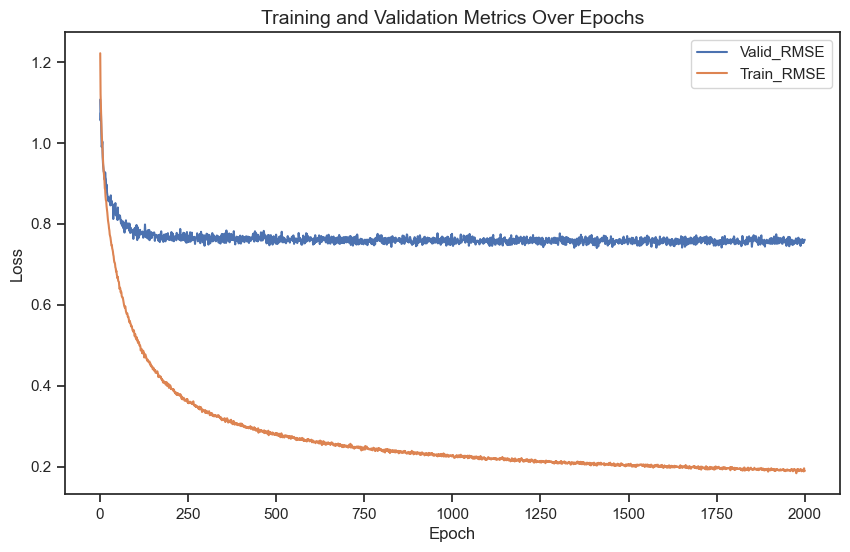

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks')
# Load metrics

metrics = train_history

# Plot the training loss over epochs using seaborn
plt.figure(figsize=(10, 6))
# sns.lineplot(data=metrics, x='epoch', y='Train Loss', label='Train Loss')
# sns.lineplot(data=metrics, x='epoch', y='Val Loss', label='Val Loss')
sns.lineplot(data=metrics, x='epoch', y='Val MSE', label='Valid_RMSE')
sns.lineplot(data=metrics, x='epoch', y='Train MSE', label='Train_RMSE')
# sns.lineplot(data=metrics, x='Epoch', y='Valid_MAE', label='Valid_MAE')
# Add titles and labels
plt.title('Training and Validation Metrics Over Epochs', fontsize=14)
# Define the range of tick positions
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.grid(False)
# Show the plot
plt.show()


In [22]:
train_history.tail()

,epoch,Train Loss,Train MSE,Train MAE,Train RMSE,Train R2,Train Pearson,Train Median_AE,Train Explained_VARVal Loss,Val MSE,Val MAE,Val RMSE,Val R2,Val Pearson,Val Median_AE,Val Explained_VAR,Train Explained_VAR,Val Loss
1995,1996,0.191065,0.191109,0.330621,0.330621,0.882393,0.939361,0.259829,NaN,0.752841,0.639834,0.639834,0.520558,0.727027,0.477811,0.521994,0.882394,0.752841
1996,1997,0.188615,0.188649,0.330012,0.330012,0.883908,0.940166,0.261694,NaN,0.759177,0.641019,0.641019,0.516523,0.723630,0.479852,0.516694,0.883908,0.759177
1997,1998,0.196397,0.196435,0.335769,0.335769,0.879116,0.937613,0.266561,NaN,0.757247,0.642582,0.642582,0.517752,0.726347,0.479817,0.520178,0.879117,0.757247
1998,1999,0.189927,0.189894,0.329562,0.329562,0.883141,0.939756,0.259182,NaN,0.759370,0.641224,0.641224,0.516400,0.723932,0.481227,0.517599,0.883141,0.759370
1999,2000,0.189916,0.189899,0.330879,0.330879,0.883138,0.939755,0.262728,NaN,0.760928,0.642099,0.642099,0.515408,0.723808,0.477544,0.516562,0.883139,0.760928
